In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [43]:
train=pd.read_csv('malignant_train.csv')

In [44]:
train

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
0               0                 0     0       0      0       0  
1               0                 0     0       0      0       0  
2               0                 0     0       0      0       0  
3               0                 0     0       0      0       0  
4               0                 0     0       0      0       0  
...           ...               ...   ...     ...    ...     ...  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0  

[159571 rows x 8 columns]

In [45]:
test=pd.read_csv('malignant_test.csv')

In [46]:
test

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

In [47]:
# Getting shape of the train and test datsets

print('Shape of the train dataset : ',train.shape)
print('Shape of the test dataset : ',test.shape)

Shape of the train dataset :  (159571, 8)
Shape of the test dataset :  (153164, 2)


In [48]:
# Getting information about train and test datasets
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


We can see there is 2 object datatypes and 6 int64 datatype features.

there is no null-values present in the dataset.

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


We can see we have 2 object datatypes and without null values in the dataset.

# Exploratory data analysis

malignant


0    144277
1     15294
Name: malignant, dtype: int64


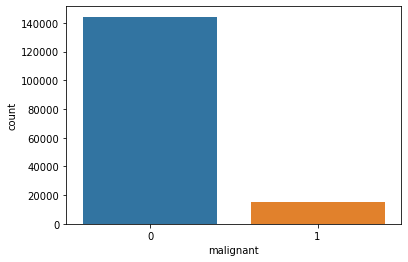

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


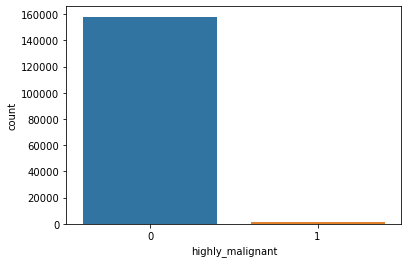

loathe


0    158166
1      1405
Name: loathe, dtype: int64


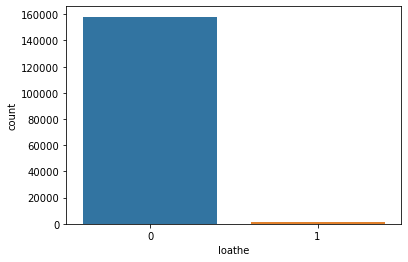

rude


0    151122
1      8449
Name: rude, dtype: int64


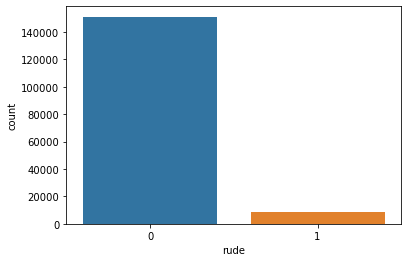

abuse


0    151694
1      7877
Name: abuse, dtype: int64


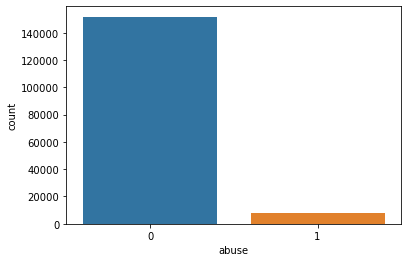

threat


0    159093
1       478
Name: threat, dtype: int64


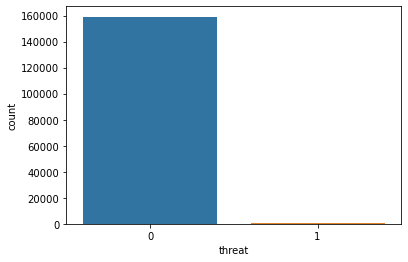

In [50]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

We can see the all count of diffrent classes and countplots to get idea about the dataset.

In [51]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
# getting length of the each commemt in train dataset
train['length'] = train['comment_text'].str.len()
train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  
0          0                 0     0       0      0       0     264  
1          0                 0     0       0      0       0     112  
2          0                 0     0       0      0       0     233  
3          0                 0     0       0      0       0     622  
4          0                 0     0       0      0       0      67

In [53]:
# getting length of the each commemt in test dataset
test['length'] = test['comment_text'].str.len()
test.head()

id                                       comment_text  length
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...     367
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...      50
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...      54
3  00017563c3f7919a  :If you have a look back at the source, the in...     205
4  00017695ad8997eb          I don't anonymously edit articles at all.      41

# Data Preprocessing

In [54]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymbols' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))



In [55]:
# Convert all messages to lower case
test['comment_text'] = test['comment_text'].str.lower()

# Replace email addresses with 'email'
test['comment_text'] = test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
test['comment_text'] = test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
test['comment_text'] = test['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test['comment_text'] = test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
# Replace numbers with 'numbr'
test['comment_text'] = test['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')


test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))



In [56]:
# Removing stopwords train dataset
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))


In [57]:
# Removing stopwords for test dataset
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))


In [58]:
# Lematization for train dataset
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [59]:
# Lematization for test dataset
lem=WordNetLemmatizer()
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [60]:
# length of cleaned comments
train['clean_length'] = train.comment_text.str.len()
train.head()

id                                       comment_text  \
0  0000997932d777bf  explanation edits made username hardcore metal...   
1  000103f0d9cfb60f  d'aww! match background colour i'm seemingly s...   
2  000113f07ec002fd  hey man, i'm really trying edit war. guy const...   
3  0001b41b1c6bb37e  can't make real suggestion improvement wondere...   
4  0001d958c54c6e35    you, sir, hero. chance remember page that's on?   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  \
0          0                 0     0       0      0       0     264   
1          0                 0     0       0      0       0     112   
2          0                 0     0       0      0       0     233   
3          0                 0     0       0      0       0     622   
4          0                 0     0       0      0       0      67   

   clean_length  
0           180  
1           111  
2           149  
3           397  
4            47

In [61]:
# length of cleaned comments
test['clean_length'] = test.comment_text.str.len()
test.head()

id                                       comment_text  \
0  00001cee341fdb12  yo bitch ja rule succesful ever whats hating s...   
1  0000247867823ef7                      == rfc == title fine is, imo.   
2  00013b17ad220c46                 == source == zawe ashton lapland —   
3  00017563c3f7919a  :if look back source, information updated corr...   
4  00017695ad8997eb                      anonymously edit article all.   

   length  clean_length  
0     367           249  
1      50            29  
2      54            34  
3     205           117  
4      41            29

In [62]:
# Total length removal train dataset
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


We can see 19317943 letters removed from train dataset

In [63]:
# Total length removal test dataset
print ('Origian Length', test.length.sum())
print ('Clean Length', test.clean_length.sum())

Origian Length 55885733
Clean Length 39556321


We can see 16329412 letters removed from test dataset

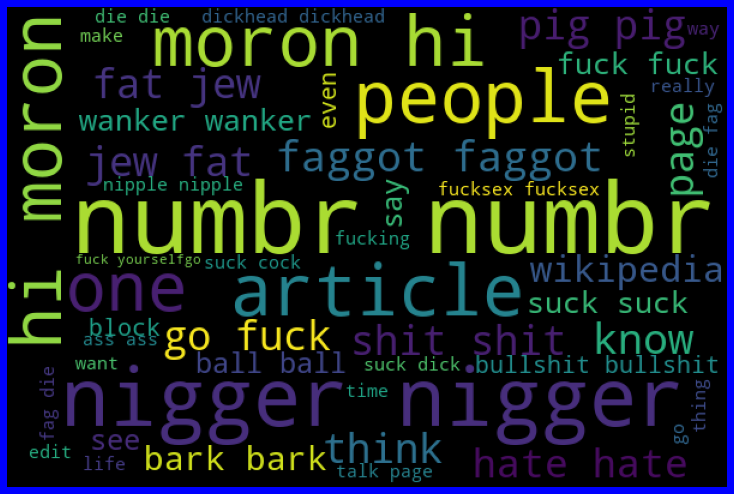

In [68]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see most affensive words in train dataset

# Model building

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [70]:
# Create new column for all affensive words
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']


target_data = train[cols_target]

train['affensive'] =train[cols_target].sum(axis =1)
print(train['affensive'].value_counts())
train['affensive'] = train['affensive'] > 0 
train['affensive'] = train['affensive'].astype(int)
print(train['affensive'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: affensive, dtype: int64
0    143346
1     16225
Name: affensive, dtype: int64


We can see 16225 affensive features and 143346 normal features

In [71]:
#  Convert text into vectors using TF-IDF train dataset
#  Select independent feature from dataset to train the model

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [72]:
#  Convert text into vectors using TF-IDF test dataset
#  Selecting independent feature from dataset to train the model

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
test_tfidf= tf_vec.fit_transform(test['comment_text'])


In [74]:
# Select dependent feature to train the model

y=train['affensive']

# Splitting the dataset to train the model using train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.25)

In [75]:
# Geeting shape of the train and test data

y_train.shape,y_test.shape

((119678,), (39893,))

In [77]:
# LogisticRegression
LG = LogisticRegression()

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9598673106168218
Test accuracy is 0.9556062467099491
[[35591   188]
 [ 1583  2531]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35779
           1       0.93      0.62      0.74      4114

    accuracy                           0.96     39893
   macro avg       0.94      0.80      0.86     39893
weighted avg       0.95      0.96      0.95     39893



In [78]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988469058640685
Test accuracy is 0.9406412152507959
[[34672  1107]
 [ 1261  2853]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     35779
           1       0.72      0.69      0.71      4114

    accuracy                           0.94     39893
   macro avg       0.84      0.83      0.84     39893
weighted avg       0.94      0.94      0.94     39893



In [79]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9229181637393673
Test accuracy is 0.9178301957736946
[[35651   128]
 [ 3150   964]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     35779
           1       0.88      0.23      0.37      4114

    accuracy                           0.92     39893
   macro avg       0.90      0.62      0.66     39893
weighted avg       0.92      0.92      0.90     39893



In [83]:
# MultinomialNB
naive=MultinomialNB()

naive.fit(x_train, y_train)
y_pred_train = naive.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = naive.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9506509132839787
Test accuracy is 0.9465821071365904
[[35643   136]
 [ 1995  2119]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     35779
           1       0.94      0.52      0.67      4114

    accuracy                           0.95     39893
   macro avg       0.94      0.76      0.82     39893
weighted avg       0.95      0.95      0.94     39893



# Ensemble

In [80]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.998821838600244
Test accuracy is 0.9556313137643195
[[35352   427]
 [ 1343  2771]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35779
           1       0.87      0.67      0.76      4114

    accuracy                           0.96     39893
   macro avg       0.91      0.83      0.87     39893
weighted avg       0.95      0.96      0.95     39893



In [81]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9508848744130083
Test accuracy is 0.9485373373774848
[[35449   330]
 [ 1723  2391]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35779
           1       0.88      0.58      0.70      4114

    accuracy                           0.95     39893
   macro avg       0.92      0.79      0.84     39893
weighted avg       0.95      0.95      0.94     39893



From  above all models randomforest classifier is giving best accuracy and f-1 score.

# Cross-validation

In [84]:
# Croos validation 
cvs=cross_val_score(RF, x, y, cv=3, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

cross validation score : 95.59757050773828
[[35643   136]
 [ 1995  2119]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     35779
           1       0.94      0.52      0.67      4114

    accuracy                           0.95     39893
   macro avg       0.94      0.76      0.82     39893
weighted avg       0.95      0.95      0.94     39893



In [85]:
# Hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators' :(60,70,80,90,100),
            'criterion':('gini','entropy')}

RF=RandomForestClassifier()

randomforest=GridSearchCV(RF,param_grid=parameters,cv=3)

random_model=randomforest.fit(x_train,y_train)

In [86]:
# Gettting best parameters
random_model.best_params_

{'criterion': 'gini', 'n_estimators': 90}

In [88]:
# fitting the model with best parameters

rfc=RandomForestClassifier(n_estimators=90,criterion='gini')
rfc.fit(x_train,y_train)
y_pred_train = rfc.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = rfc.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988134828456358
Test accuracy is 0.9556313137643195
[[35332   447]
 [ 1323  2791]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35779
           1       0.86      0.68      0.76      4114

    accuracy                           0.96     39893
   macro avg       0.91      0.83      0.87     39893
weighted avg       0.95      0.96      0.95     39893



In [89]:
# Saving best model

import joblib

joblib.dump(rfc,'malignant_comments_classifier.ob')

['malignant_comments_classifier.ob']

In [90]:
# Passing test data into saved model

rfc_model=joblib.load('malignant_comments_classifier.ob')

In [91]:
Predictions=rfc_model.predict(test_tfidf)

In [92]:
Predictions

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
# Saving predicted values in CSV file

output=pd.DataFrame(Predictions)
output.columns=['Predictions']
output.to_csv('malignant_comments_classification_predictions.csv')